In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1999, 1, 29), end=datetime(2017, 8, 31))

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_excel('Korea.xlsx')

In [3]:
data.set_index(data['Date'], inplace=True)
data.set_index('Date', inplace=True)

In [4]:
dateparse = lambda data: pd.to_datetime(data, format='%m%d%Y')

In [12]:
print data.head()

                  C
Date               
2/26/1999 -0.159573
3/31/1999  0.270392
4/30/1999  0.066698
5/28/1999 -0.212487
6/30/1999  0.234716


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):        
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [15]:
test_stationarity(data["C"])

Results of Dickey-Fuller Test:
Test Statistic                -8.702686e+00
p-value                        3.771910e-14
#Lags Used                     7.000000e+00
Number of Observations Used    2.150000e+02
Critical Value (5%)           -2.875079e+00
Critical Value (1%)           -3.461136e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


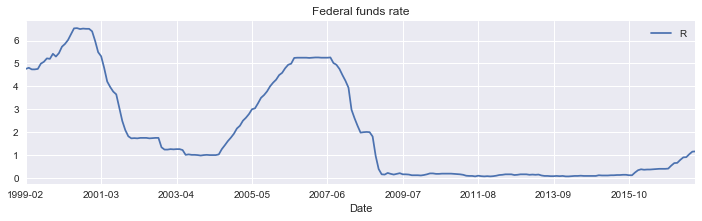

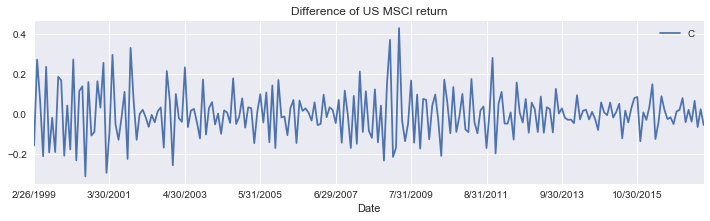

In [5]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
fed = pd.read_excel('Fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

# Plot the data
fed.plot(title='Federal funds rate', figsize=(12,3))
data.plot(title="Difference of US MSCI return" , figsize=(12,3))


In [17]:
mod = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=3, switching_ar=False)
res = mod.fit()
print (res.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 210.124
Date:                  Mon, 27 Nov 2017   AIC                           -404.247
Time:                          02:06:54   BIC                           -377.098
Sample:                      05-28-1999   HQIC                          -393.284
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.014     -0.032      0.974      -0.028       0.027
                             Regime 

In [18]:
mod_fedfunds = sm.tsa.MarkovRegression(fed, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()
print(res_fedfunds.summary())

                        Markov Switching Model Results                        
Dep. Variable:                      R   No. Observations:                  223
Model:               MarkovRegression   Log Likelihood                -280.190
Date:                Mon, 27 Nov 2017   AIC                            570.380
Time:                        02:07:02   BIC                            587.416
Sample:                    02-01-1999   HQIC                           577.257
                         - 08-01-2017                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6643      0.067      9.935      0.000       0.533       0.795
                             Regime 1 parameters    

In [10]:
# best
mod_ = sm.tsa.MarkovAutoregression(
    data.ix[2:, 'C'], k_regimes=2, order=5, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed.ix[1:-1, 'R']))

In [11]:
res_=mod_.fit()

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
print(res_.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        C   No. Observations:                  216
Model:             MarkovAutoregression   Log Likelihood                 234.914
Date:                  Mon, 27 Nov 2017   AIC                           -433.828
Time:                          02:18:15   BIC                           -373.073
Sample:                      09-30-1999   HQIC                          -409.283
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.003      0.145      0.884      -0.005       0.006
sigma2         0.0011      0.000    

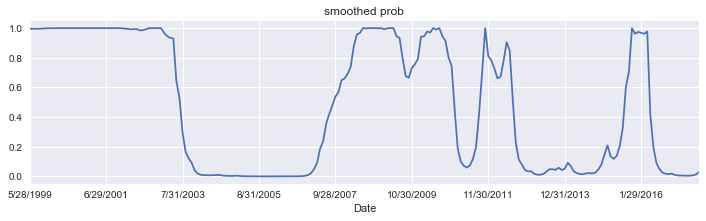

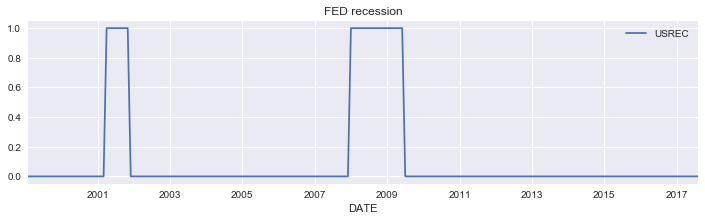

In [108]:
res_.smoothed_marginal_probabilities[0].plot(title='smoothed prob', figsize=(12,3))
usrec.plot(title='FED recession', figsize=(12,3))

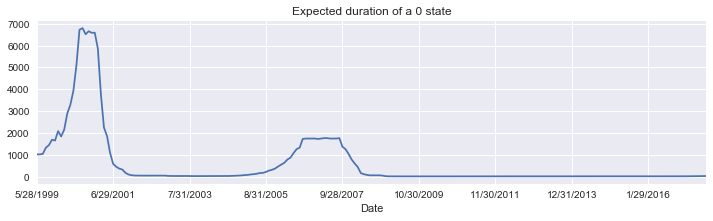

In [106]:
res_.expected_durations[0].plot(
    title='Expected duration of a 0 state', figsize=(12,3));

In [ ]:
#During recessions, the expected duration of a low-production state is much higher than in an expansion.

In [109]:
mod1 = sm.tsa.MarkovAutoregression(
    data.ix[2:, 'USA'], k_regimes=2, order=1, switching_ar= True, switching_variance=True,
    exog=sm.add_constant(fed.ix[1:-1, 'R']))

In [110]:
res1=mod1.fit()

In [114]:
print(res1.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      USA   No. Observations:                  220
Model:             MarkovAutoregression   Log Likelihood                 361.739
Date:                  Mon, 27 Nov 2017   AIC                           -703.479
Time:                          01:46:16   BIC                           -669.542
Sample:                      05-28-1999   HQIC                          -689.774
                           - 08-31-2017                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023        nan        nan        nan         nan         nan
sigma2         0.0007      0.000    